<a href="https://colab.research.google.com/github/hwon-n/section2_project/blob/main/section2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -U pandas_profiling

In [3]:
!pip install category_encoders

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from category_encoders import OneHotEncoder, OrdinalEncoder, TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [51]:
train = pd.read_csv('/content/drive/MyDrive/Training Data.csv')
test = pd.read_csv('/content/drive/MyDrive/Test Data.csv')

train.shape, test.shape

((252000, 13), (28000, 12))

In [52]:
train = train.sample(n = 60000, random_state = 42).reset_index(drop = True)
train.shape

(60000, 13)

In [53]:
test = test.sample(n = 10000, random_state = 42).reset_index(drop = True)
test.shape

(10000, 12)

In [8]:
train.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [54]:
train.rename(columns = {'Id': 'ID'}, inplace = True)
train.head().T

,0,1,2,3,4
ID,75256,192436,154840,59775,63789
Income,4260981,8529345,7848654,8491491,1537266
Age,47,44,55,61,78
Experience,18,2,9,20,13
Married/Single,single,single,single,single,single
House_Ownership,rented,rented,rented,rented,rented
Car_Ownership,no,no,no,no,no
Profession,Politician,Computer_hardware_engineer,Software_Developer,Comedian,Web_designer
CITY,Hindupur,Narasaraopet,Patna,Haldia,Coimbatore
STATE,Andhra_Pradesh,Andhra_Pradesh,Bihar,West_Bengal,Tamil_Nadu


In [55]:
# Logistic Regression model 

target = 'Risk_Flag'

train, val = train_test_split(train, train_size = 0.8, random_state = 42)
train.shape, val.shape

((48000, 13), (12000, 13))

In [27]:
# baseline 설정
value = train['Risk_Flag'].value_counts(normalize = True)
value[0]

0.8775416666666667

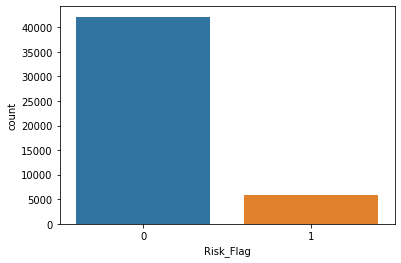

In [28]:
%matplotlib inline
ax = sns.countplot(data = train, x = target)
plt.show()

In [29]:
train['Income']

48572    3463312
38696    9446738
13611    8613547
35213    4842954
31766    1464300
          ...   
54343    1861875
38158    2013414
860      6164439
15795    4508919
56422    5570090
Name: Income, Length: 48000, dtype: int64

In [30]:
train['STATE'].value_counts()

Uttar_Pradesh        5354
Maharashtra          4821
Andhra_Pradesh       4760
West_Bengal          4488
Bihar                3791
Tamil_Nadu           3252
Madhya_Pradesh       2677
Karnataka            2226
Gujarat              2160
Rajasthan            1767
Jharkhand            1671
Haryana              1526
Telangana            1477
Assam                1388
Kerala               1059
Delhi                1000
Odisha                902
Punjab                899
Chhattisgarh          734
Uttarakhand           378
Jammu_and_Kashmir     344
Puducherry            282
Manipur               177
Himachal_Pradesh      170
Tripura               157
Mizoram               156
Chandigarh            148
Uttar_Pradesh[5]      135
Sikkim                101
Name: STATE, dtype: int64

In [31]:
train['CURRENT_HOUSE_YRS'].value_counts()

11    9875
12    9811
13    9728
14    9395
10    9191
Name: CURRENT_HOUSE_YRS, dtype: int64

In [56]:
train.head().T

,48572,38696,13611,35213,31766
ID,10225,43260,55950,232595,185528
Income,7071461,2015341,9719853,615808,5679259
Age,48,47,61,56,78
Experience,10,6,14,3,17
Married/Single,single,single,single,single,single
House_Ownership,owned,rented,rented,rented,rented
Car_Ownership,no,no,yes,no,no
Profession,Geologist,Graphic_Designer,Civil_servant,Scientist,Official
CITY,Miryalaguda,Panvel,Mango,Warangal[11][12],Rohtak
STATE,Telangana,Maharashtra,Jharkhand,Telangana,Haryana


In [57]:
# feature engineering

# ordinal encoder 사용
def age(age):
  if age > 60:
    return 'over 60'
  elif age > 40:
    return '4-50s'
  elif age > 30:
    return '30s'
  else:
    return 'under 30'


# onehotencoder 사용
def north(state):
  # 북부지역이면 1, 아니면 0을 return
  north_list = ['Sikkim', 'Uttar_Pradesh', 'Chandigarh', 'Manipur', 'Tripura', 'Mizoram', 'Himachal_Pradesh', 'Jammu_and_Kashmir', 
                'Uttarakhand', 'Punjab', 'Assam', 'Telangana', 'Haryana', 'Rajasthan', 'Bihar', 'West_Bengal']
  if state in north_list:
    return 1
  else:
    return 0

# Experience def 정의하기
def exp(exp):
  

# ordinal encoder 사용
def job_year(year):
  if year < 5:
    return 1
  elif year <= 10:
    return 2
  else:
    return 3

def feature(df):
  cols = ['ID', 'CITY']

  df.drop(columns = cols, inplace = True)

  df['Age'] = df['Age'].apply(age)
  df['Income'] = df['Income'].apply(lambda x: 'over mean' if x > 4997678 else 'under mean')
  df['CURRENT_JOB_YRS'] = df['CURRENT_JOB_YRS'].apply(job_year)
  df['STATE'] = df['STATE'].apply(north)

  return df

train = feature(train)
val2 = feature(val)
test = feature(test)

train.head().T

,48572,38696,13611,35213,31766
Income,over mean,under mean,over mean,under mean,over mean
Age,4-50s,4-50s,over 60,4-50s,over 60
Experience,10,6,14,3,17
Married/Single,single,single,single,single,single
House_Ownership,owned,rented,rented,rented,rented
Car_Ownership,no,no,yes,no,no
Profession,Geologist,Graphic_Designer,Civil_servant,Scientist,Official
STATE,1,0,0,1,1
CURRENT_JOB_YRS,1,2,1,1,3
CURRENT_HOUSE_YRS,12,13,13,10,10
